
# Actividad Autónoma 2 – Unidad 2: Manipulación y Análisis de Datos con NumPy
**Nombre:** Gabriela Elizabeth Ocampo Isquierdo  
**Fecha:** 27/05/2025  
**Asignatura:** Programación Orientada a Objetos  

---

Esta actividad tiene como propósito aplicar conocimientos avanzados de NumPy para resolver problemas matemáticos y computacionales típicos en análisis de datos, álgebra lineal y métodos numéricos. Cada ejercicio está documentado con comentarios, pruebas y explicaciones que permiten entender no solo el *cómo*, sino también el *por qué* de cada solución.



## Ejercicio 2 – Álgebra lineal y operaciones básicas: Norma de Frobenius e Infinita

Se implementa la **norma de Frobenius**, que mide el tamaño de una matriz sumando los cuadrados de todos sus elementos y sacando la raíz cuadrada. Esta norma es útil para evaluar el error entre matrices o medir su magnitud global.

También calculamos la **norma infinita**, que es el máximo de la suma absoluta por filas. Esta norma es usada frecuentemente en estimaciones de error y análisis de estabilidad numérica.


In [1]:

import numpy as np

def norma_frobenius(A):
    # Calcula la norma de Frobenius como raíz de la suma de los cuadrados
    suma_cuadrados = np.sum(A**2)
    return np.sqrt(suma_cuadrados)

# Matriz de prueba
A = np.array([[3, 4], [1, 2]])

# Resultados
norma_f = norma_frobenius(A)
norma_f_numpy = np.linalg.norm(A, 'fro')
norma_inf_numpy = np.linalg.norm(A, np.inf)

print("Norma de Frobenius (implementada):", norma_f)
print("Norma de Frobenius (NumPy):", norma_f_numpy)
print("Norma Infinita (NumPy):", norma_inf_numpy)


Norma de Frobenius (implementada): 5.477225575051661
Norma de Frobenius (NumPy): 5.477225575051661
Norma Infinita (NumPy): 7.0


In [2]:

# Prueba adicional con otra matriz
B = np.array([[5, -1], [2, 3]])
print("Norma de Frobenius (nueva matriz):", norma_frobenius(B))
print("Norma de Frobenius (NumPy):", np.linalg.norm(B, 'fro'))
print("Norma Infinita (NumPy):", np.linalg.norm(B, np.inf))


Norma de Frobenius (nueva matriz): 6.244997998398398
Norma de Frobenius (NumPy): 6.244997998398398
Norma Infinita (NumPy): 6.0



## Ejercicio 6 – Cálculo numérico y análisis: Serie de Fourier discreta

La Transformada Discreta de Fourier (DFT) permite analizar las **frecuencias** presentes en una señal. Se implementa sin `np.fft` para reforzar el entendimiento del proceso de transformación.

Es fundamental para el análisis de señales, compresión de audio e imagen, y para detectar patrones periódicos en datos.


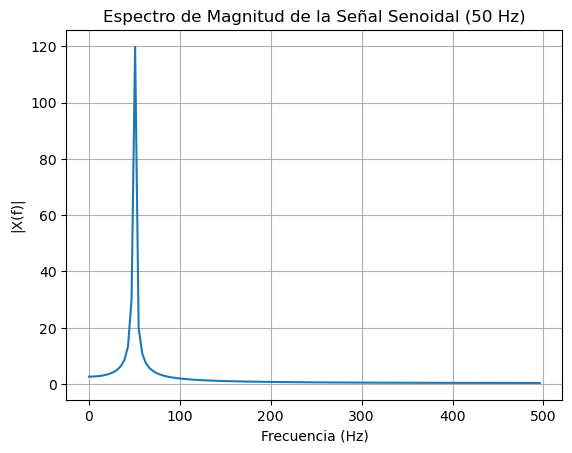

In [3]:

def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return np.dot(W, x)

# Señal senoidal de prueba
fs = 1000
f = 50
t = np.arange(0, 1, 1/fs)
x = np.sin(2 * np.pi * f * t)
x_sample = x[:256]

X = dft(x_sample)
magnitudes = np.abs(X)

import matplotlib.pyplot as plt

frecuencias = np.fft.fftfreq(len(x_sample), d=1/fs)
plt.plot(frecuencias[:128], magnitudes[:128])
plt.title("Espectro de Magnitud de la Señal Senoidal (50 Hz)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("|X(f)|")
plt.grid()
plt.show()


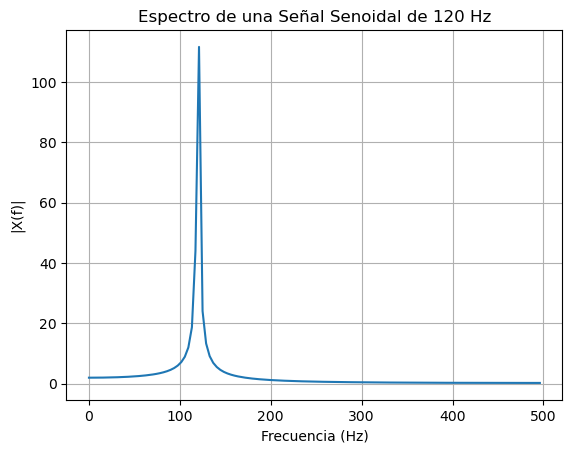

In [4]:

# Prueba con señal de 120 Hz
f2 = 120
x2 = np.sin(2 * np.pi * f2 * t)
x2_sample = x2[:256]
X2 = dft(x2_sample)
magnitudes2 = np.abs(X2)
frecuencias2 = np.fft.fftfreq(len(x2_sample), d=1/fs)

plt.plot(frecuencias2[:128], magnitudes2[:128])
plt.title("Espectro de una Señal Senoidal de 120 Hz")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("|X(f)|")
plt.grid()
plt.show()



## Ejercicio 11 – Álgebra matricial avanzada: Iteración de la potencia

Este método permite encontrar el **autovalor dominante** (de mayor magnitud) y su autovector asociado. Es fundamental cuando trabajamos con matrices grandes, como en el análisis de estabilidad de sistemas o algoritmos de aprendizaje automático.


In [5]:

def power_iteration(A, num_iter=1000, tol=1e-10):
    n, _ = A.shape
    b_k = np.random.rand(n)

    for _ in range(num_iter):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k_next = b_k1 / b_k1_norm

        if np.linalg.norm(b_k_next - b_k) < tol:
            break
        b_k = b_k_next

    autovalor = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)
    return autovalor, b_k

A = np.array([[2, 1], [1, 3]])
autovalor_dominante, autovector = power_iteration(A)

autovalores, autovectores = np.linalg.eig(A)
indice_max = np.argmax(np.abs(autovalores))

print("Autovalor dominante (power_iteration):", autovalor_dominante)
print("Autovalor dominante (NumPy):", autovalores[indice_max])
print("Autovector aproximado (power_iteration):", autovector)
print("Autovector NumPy:", autovectores[:, indice_max])


Autovalor dominante (power_iteration): 3.6180339887498945
Autovalor dominante (NumPy): 3.618033988749895
Autovector aproximado (power_iteration): [0.52573111 0.85065081]
Autovector NumPy: [-0.52573111 -0.85065081]


In [6]:

# Prueba adicional
B = np.array([[4, 2], [1, 3]])
autovalor2, autovector2 = power_iteration(B)
autovalores_np2, autovectores_np2 = np.linalg.eig(B)
indice_max2 = np.argmax(np.abs(autovalores_np2))

print("Autovalor dominante (power_iteration):", autovalor2)
print("Autovalor dominante (NumPy):", autovalores_np2[indice_max2])
print("Autovector (power_iteration):", autovector2)
print("Autovector (NumPy):", autovectores_np2[:, indice_max2])


Autovalor dominante (power_iteration): 5.000000000071272
Autovalor dominante (NumPy): 5.0
Autovector (power_iteration): [0.89442719 0.4472136 ]
Autovector (NumPy): [0.89442719 0.4472136 ]
